# Does dorm matter for well-being?

A: Probably not.

We fit a range of models to predict student's t2 (fall) well-being (measured in week 4 of the semester).

Life satisfaction:

Overall, their reported life satisfaction at t1 (measured in week 0, before the semester began) explained most of the variance in t2 life satisfaction (approx 55%), with trace amounts of additional variance explainable by additional variables (approx 3% more). The few variables that remained significant contributors to the model, above and beyond t1 life satisfaction, were: stress at t1, loneliness at t1, and number of network nominations (in and out) at t2. All were in the intuitive directions but very small in size. No traits of the person's network were significant.

Mixed-effects models showed that *none* of the residual variance in life satisfaction could be attributed to membership in particular dorms.

Loneliness:

Similar results to above, only t1 loneliness could only explain some 26% of t2 loneliness. However, additional variables still only explained about 3% more of the variance.

Stress:

A bit better. t1 stress can explain some 21% of variance in t2 stress, but additional predictors can explain another 7%. The in and out degrees didn't seem to matter, amazingly, but being female was associated with higher stress, as was high neuroticism (which is associated with being female). Dorm and network variables were still non-significant.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Configuration" data-toc-modified-id="Configuration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Configuration</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Cleaning---drop-rows-we-don't-want" data-toc-modified-id="Cleaning---drop-rows-we-don't-want-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cleaning - drop rows we don't want</a></span><ul class="toc-item"><li><span><a href="#Drop-people-who-made-no-network-nominations" data-toc-modified-id="Drop-people-who-made-no-network-nominations-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Drop people who made no network nominations</a></span></li><li><span><a href="#Drop-people-with-fewer-than-3-network-connections-(in-or-out)-as-we-don't-trust-the-averages-of-their-network's-traits" data-toc-modified-id="Drop-people-with-fewer-than-3-network-connections-(in-or-out)-as-we-don't-trust-the-averages-of-their-network's-traits-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Drop people with fewer than 3 network connections (in or out) as we don't trust the averages of their network's traits</a></span></li><li><span><a href="#Drop-the-rows-with-missing-values-(~20%)" data-toc-modified-id="Drop-the-rows-with-missing-values-(~20%)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Drop the rows with missing values (~20%)</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Base-models---predict-well-being-at-t1-from-well-being-at-t1" data-toc-modified-id="Base-models---predict-well-being-at-t1-from-well-being-at-t1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Base models - predict well-being at t1 from well-being at t1</a></span></li><li><span><a href="#Fixed-effects-models:-predict-WB-at-t2-from-WB-and-other-personal-factors-at-t1" data-toc-modified-id="Fixed-effects-models:-predict-WB-at-t2-from-WB-and-other-personal-factors-at-t1-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Fixed-effects models: predict WB at t2 from WB and other personal factors at t1</a></span></li><li><span><a href="#Lets-reduce-our-fixed-effects-model-to-only-wellbeing-and-in/out-degree-measures" data-toc-modified-id="Lets-reduce-our-fixed-effects-model-to-only-wellbeing-and-in/out-degree-measures-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Lets reduce our fixed effects model to only wellbeing and in/out degree measures</a></span><ul class="toc-item"><li><span><a href="#Store-this-equation-for-use-in-many-models-below" data-toc-modified-id="Store-this-equation-for-use-in-many-models-below-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Store this equation for use in many models below</a></span></li></ul></li><li><span><a href="#Examine-residuals-by-dorm.-If-there-is-a-sigificant-dorm-wide-effect,-we-should-see-some-clear-boxes-that-are-above-and-below-zero.-(Spoiler-alert:-we-don't)" data-toc-modified-id="Examine-residuals-by-dorm.-If-there-is-a-sigificant-dorm-wide-effect,-we-should-see-some-clear-boxes-that-are-above-and-below-zero.-(Spoiler-alert:-we-don't)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Examine residuals by dorm. If there is a sigificant dorm-wide effect, we should see some clear boxes that are above and below zero. (Spoiler alert: we don't)</a></span></li></ul></li><li><span><a href="#Add-random-effect-for-dorm,-see-if-significant-variance-is-attributable-to-dorm-membership-(Result:-no)" data-toc-modified-id="Add-random-effect-for-dorm,-see-if-significant-variance-is-attributable-to-dorm-membership-(Result:-no)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Add random effect for dorm, see if significant variance is attributable to dorm membership (Result: no)</a></span><ul class="toc-item"><li><span><a href="#Try-again,-with-some-dorm-level-covariates" data-toc-modified-id="Try-again,-with-some-dorm-level-covariates-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Try again, with some dorm-level covariates</a></span></li></ul></li><li><span><a href="#Fixed-effects-model,-including-network-features-(average-traits-of-people-connected-to-the-individual-via-nominations)" data-toc-modified-id="Fixed-effects-model,-including-network-features-(average-traits-of-people-connected-to-the-individual-via-nominations)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fixed effects model, including network features (average traits of people connected to the individual via nominations)</a></span></li></ul></div>

## Configuration

In [1]:
DV = 'life_satisfaction'
# DV = 'stress'
# DV = 'loneliness'

DV_t1 = paste(DV, 't1', sep='_')
DV_t2 = paste(DV, 't2', sep='_')
c(DV, DV_t1, DV_t2)

[1] "life_satisfaction"    "life_satisfaction_t1" "life_satisfaction_t2"

In [2]:
all_wb_params = "life_satisfaction_t1 + loneliness_t1 + stress_t1"

all_fixed_params = "edges_in + edges_out +
C(gender) + C(race) + empathy +
BFI_E + BFI_O + BFI_C + BFI_A + BFI_N +
intl_student + parent_education_highest + log10(family_income)"


## Libraries

In [3]:
library(car)
library(tidyverse)
library(mice)
library(nlme)
library(lme4)
library(lmerTest)

# Display more data in the Jupyter notebook
options(repr.matrix.max.cols=500, repr.matrix.max.rows=20)

Loading required package: carData

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ purrr::some()   masks car::some()

Loading required package: lattice

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 


Attaching package: ‘mice’


The following object is masked from ‘package:tidyr’:

    complete


The following objects are masked from ‘package:base’:

    cbind, rbind



Attaching package: ‘nlme’


The following object is mask

In [4]:
df = read.csv('../data/2019–2020/postprocessed/df_full_train.csv', na.strings=c(""," ", "NA"))
dim(df)
head(df)

[1] 560  57

,PID,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_O,BFI_N,BFI_C,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest,edges_in,edges_out,edges_reciprocal,edges_unique,dorm_life_satisfaction_t1,dorm_empathy,dorm_loneliness_t1,dorm_stress_t1,dorm_BFI_E,dorm_BFI_A,dorm_BFI_O,dorm_BFI_N,dorm_BFI_C,dorm_intl_student,dorm_family_income,dorm_life_satisfaction_t2,dorm_loneliness_t2,dorm_stress_t2,dorm_edges_in,dorm_edges_out,dorm_edges_reciprocal,dorm_edges_unique,dorm_n_dormmates,network_life_satisfaction_t1,network_empathy,network_loneliness_t1,network_stress_t1,network_BFI_E,network_BFI_A,network_BFI_O,network_BFI_N,network_BFI_C,network_intl_student,network_family_income,network_life_satisfaction_t2,network_loneliness_t2,network_stress_t2,network_n_networkmates
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,6.5,3.5,5.5,0,70000,6.166667,2.000000,1.5,4_masters,3,10,1,12,5.034483,5.504310,1.839080,2.000000,4.534483,4.982759,5.379310,3.327586,5.672414,0.17241379,116206.9,4.931034,2.034483,1.948276,5.206897,10.931034,3.379310,12.758621,29,4.916667,5.937500,2.166667,2.50,6.750,4.750000,5.75,4.500000,5.000000,0.0000000,175000.00,5.750000,2.333333,1.75,2
2,1047,female,other_or_mixed,Twain,5.333333,6.500,2.000000,2.5,5.5,6.5,6.5,3.0,7.0,0,220000,5.166667,2.000000,3.0,4_masters,6,9,3,12,5.333333,5.717105,1.684211,1.986842,4.039474,5.197368,5.421053,2.907895,5.552632,0.13157895,143513.5,5.241228,1.728070,2.000000,4.394737,8.157895,2.473684,10.078947,38,5.055556,6.354167,1.444444,2.00,5.250,5.416667,5.50,2.833333,5.166667,0.1666667,91666.67,4.833333,1.444444,2.25,6
3,1078,female,east_asian,Loro,5.500000,6.250,1.333333,2.0,4.5,6.5,6.5,1.5,6.5,0,130000,5.500000,2.333333,3.0,5_advanced,1,7,0,8,4.000000,5.593750,1.861111,2.250000,3.875000,4.625000,5.375000,3.541667,5.000000,0.08333333,129090.9,4.430556,2.000000,1.958333,2.333333,6.833333,1.500000,7.666667,12,4.666667,5.250000,1.000000,1.50,2.500,5.500000,3.50,1.500000,4.000000,0.0000000,90000.00,4.666667,1.000000,1.50,1
4,1097,male,east_asian,Otero,6.000000,5.000,2.000000,2.0,3.0,4.0,4.5,1.5,5.5,0,90000,5.833333,2.000000,2.5,5_advanced,6,4,4,6,5.439815,5.701389,1.777778,1.916667,4.444444,4.902778,5.263889,2.916667,5.708333,0.02777778,141428.6,5.268519,1.861111,1.916667,4.777778,10.000000,2.722222,12.055556,36,5.400000,5.950000,1.733333,2.40,4.400,5.400000,5.10,3.100000,5.700000,0.0000000,130000.00,4.866667,2.133333,2.20,5
5,1105,female,white,Larkin,6.666667,5.750,2.000000,2.0,4.5,5.0,4.5,2.0,5.0,0,170000,6.666667,2.000000,2.0,3_college_fouryear,6,26,3,29,5.098765,5.819444,1.802469,2.074074,4.657407,4.935185,5.407407,3.268519,5.685185,0.15094340,138235.3,4.913580,1.817610,2.188679,5.759259,8.962963,3.296296,11.425926,54,5.483333,5.800000,1.600000,2.25,5.250,4.350000,5.65,3.750000,5.550000,0.2000000,161000.00,5.133333,1.966667,2.20,10
6,1110,female,white,Larkin,5.166667,6.750,2.000000,2.0,6.5,5.0,4.5,2.0,6.0,0,110000,6.833333,1.666667,2.0,4_masters,4,9,4,9,5.126543,5.800926,1.802469,2.074074,4.620370,4.935185,5.407407,3.268519,5.666667,0.15094340,139411.8,4.910494,1.823899,2.188679,5.796296,9.277778,3.277778,11.796296,54,5.625000,5.437500,2.000000,1.75,4.375,5.250000,5.00,2.625000,5.750000,0.0000000,152500.00,5.750000,1.666667,2.00,4


In [5]:
str(df)

'data.frame':	560 obs. of  57 variables:
 $ PID                         : int  1001 1047 1078 1097 1105 1110 1128 1132 1134 1162 ...
 $ gender                      : Factor w/ 3 levels "female","male",..: 2 1 1 2 1 1 1 1 2 1 ...
 $ race                        : Factor w/ 6 levels "black","east_asian",..: 5 4 2 2 6 6 6 NA 3 2 ...
 $ dorm                        : Factor w/ 21 levels "Alondra","Arroyo",..: 16 19 11 15 10 10 7 15 2 3 ...
 $ life_satisfaction_t1        : num  4.83 5.33 5.5 6 6.67 ...
 $ empathy                     : num  6.38 6.5 6.25 5 5.75 ...
 $ loneliness_t1               : num  1.33 2 1.33 2 2 ...
 $ stress_t1                   : num  2.5 2.5 2 2 2 2 1.5 2 1.5 1 ...
 $ BFI_E                       : num  6.5 5.5 4.5 3 4.5 6.5 5 7 5.5 3.5 ...
 $ BFI_A                       : num  6 6.5 6.5 4 5 5 5 5 5 6.5 ...
 $ BFI_O                       : num  6.5 6.5 6.5 4.5 4.5 4.5 5.5 5.5 6 7 ...
 $ BFI_N                       : num  3.5 3 1.5 1.5 2 2 2 2.5 1.5 3 ...
 $ BFI_C      

## Cleaning - drop rows we don't want

### Drop people who made no network nominations

In [6]:
# print(dim(df))
# df = df[df$edges_out != 0,]
# print(dim(df))

### Drop people with fewer than 3 network connections (in or out) as we don't trust the averages of their network's traits

In [7]:
# table(df$edges_unique)

In [8]:
# print(dim(df))
# df = df[df$edges_unique >= 3,]
# print(dim(df))

### Drop the rows with missing values (~20%)

,PID,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_O,BFI_N,BFI_C,edges_in,edges_out,edges_reciprocal,edges_unique,dorm_life_satisfaction_t1,dorm_empathy,dorm_loneliness_t1,dorm_stress_t1,dorm_BFI_E,dorm_BFI_A,dorm_BFI_O,dorm_BFI_N,dorm_BFI_C,dorm_intl_student,dorm_family_income,dorm_life_satisfaction_t2,dorm_loneliness_t2,dorm_stress_t2,dorm_edges_in,dorm_edges_out,dorm_edges_reciprocal,dorm_edges_unique,dorm_n_dormmates,life_satisfaction_t2,loneliness_t2,stress_t2,intl_student,gender,parent_education_highest,network_n_networkmates,family_income,network_life_satisfaction_t1,network_empathy,network_loneliness_t1,network_stress_t1,network_BFI_E,network_BFI_A,network_BFI_O,network_BFI_N,network_BFI_C,network_intl_student,network_family_income,network_life_satisfaction_t2,network_loneliness_t2,network_stress_t2,race,
446,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
49,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
12,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,2
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16
13,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16
11,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


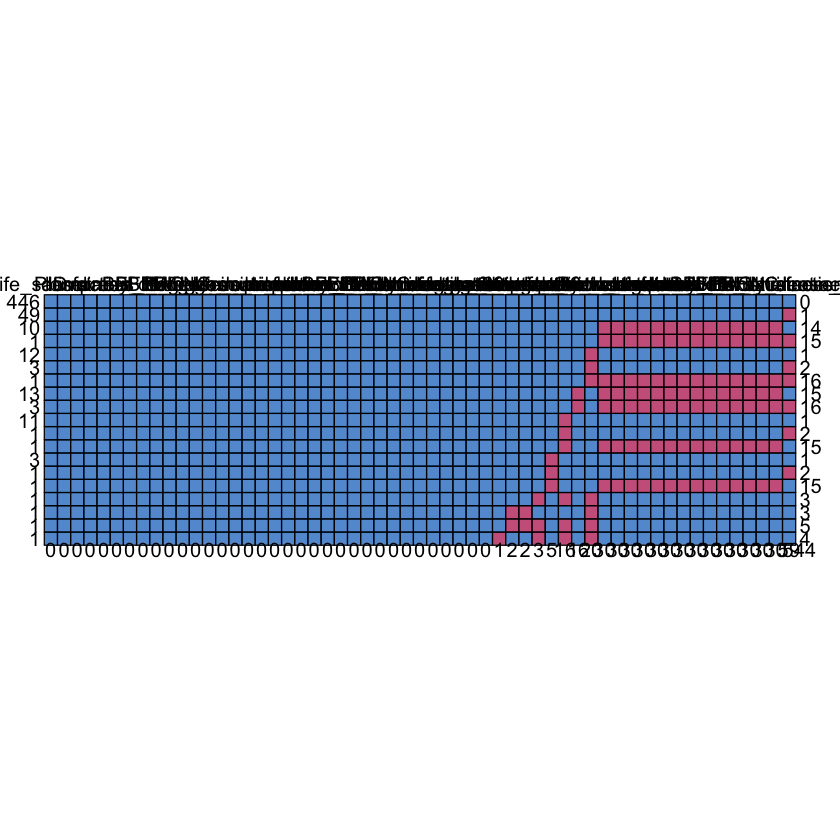

In [9]:
md.pattern(df)

In [10]:
# imputed <- mice(df, m=1)
# df = complete(imputed)
# sum(is.na(df))

In [11]:
dim(df)
df = df[complete.cases(df), ]
dim(df)

[1] 560  57

[1] 446  57

## Model

In [12]:
head(df)

,PID,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_O,BFI_N,BFI_C,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest,edges_in,edges_out,edges_reciprocal,edges_unique,dorm_life_satisfaction_t1,dorm_empathy,dorm_loneliness_t1,dorm_stress_t1,dorm_BFI_E,dorm_BFI_A,dorm_BFI_O,dorm_BFI_N,dorm_BFI_C,dorm_intl_student,dorm_family_income,dorm_life_satisfaction_t2,dorm_loneliness_t2,dorm_stress_t2,dorm_edges_in,dorm_edges_out,dorm_edges_reciprocal,dorm_edges_unique,dorm_n_dormmates,network_life_satisfaction_t1,network_empathy,network_loneliness_t1,network_stress_t1,network_BFI_E,network_BFI_A,network_BFI_O,network_BFI_N,network_BFI_C,network_intl_student,network_family_income,network_life_satisfaction_t2,network_loneliness_t2,network_stress_t2,network_n_networkmates
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,6.5,3.5,5.5,0,70000,6.166667,2.000000,1.5,4_masters,3,10,1,12,5.034483,5.504310,1.839080,2.000000,4.534483,4.982759,5.379310,3.327586,5.672414,0.17241379,116206.9,4.931034,2.034483,1.948276,5.206897,10.931034,3.379310,12.758621,29,4.916667,5.937500,2.166667,2.50,6.750,4.750000,5.75,4.500000,5.000000,0.0000000,175000.00,5.750000,2.333333,1.75,2
2,1047,female,other_or_mixed,Twain,5.333333,6.500,2.000000,2.5,5.5,6.5,6.5,3.0,7.0,0,220000,5.166667,2.000000,3.0,4_masters,6,9,3,12,5.333333,5.717105,1.684211,1.986842,4.039474,5.197368,5.421053,2.907895,5.552632,0.13157895,143513.5,5.241228,1.728070,2.000000,4.394737,8.157895,2.473684,10.078947,38,5.055556,6.354167,1.444444,2.00,5.250,5.416667,5.50,2.833333,5.166667,0.1666667,91666.67,4.833333,1.444444,2.25,6
3,1078,female,east_asian,Loro,5.500000,6.250,1.333333,2.0,4.5,6.5,6.5,1.5,6.5,0,130000,5.500000,2.333333,3.0,5_advanced,1,7,0,8,4.000000,5.593750,1.861111,2.250000,3.875000,4.625000,5.375000,3.541667,5.000000,0.08333333,129090.9,4.430556,2.000000,1.958333,2.333333,6.833333,1.500000,7.666667,12,4.666667,5.250000,1.000000,1.50,2.500,5.500000,3.50,1.500000,4.000000,0.0000000,90000.00,4.666667,1.000000,1.50,1
4,1097,male,east_asian,Otero,6.000000,5.000,2.000000,2.0,3.0,4.0,4.5,1.5,5.5,0,90000,5.833333,2.000000,2.5,5_advanced,6,4,4,6,5.439815,5.701389,1.777778,1.916667,4.444444,4.902778,5.263889,2.916667,5.708333,0.02777778,141428.6,5.268519,1.861111,1.916667,4.777778,10.000000,2.722222,12.055556,36,5.400000,5.950000,1.733333,2.40,4.400,5.400000,5.10,3.100000,5.700000,0.0000000,130000.00,4.866667,2.133333,2.20,5
5,1105,female,white,Larkin,6.666667,5.750,2.000000,2.0,4.5,5.0,4.5,2.0,5.0,0,170000,6.666667,2.000000,2.0,3_college_fouryear,6,26,3,29,5.098765,5.819444,1.802469,2.074074,4.657407,4.935185,5.407407,3.268519,5.685185,0.15094340,138235.3,4.913580,1.817610,2.188679,5.759259,8.962963,3.296296,11.425926,54,5.483333,5.800000,1.600000,2.25,5.250,4.350000,5.65,3.750000,5.550000,0.2000000,161000.00,5.133333,1.966667,2.20,10
6,1110,female,white,Larkin,5.166667,6.750,2.000000,2.0,6.5,5.0,4.5,2.0,6.0,0,110000,6.833333,1.666667,2.0,4_masters,4,9,4,9,5.126543,5.800926,1.802469,2.074074,4.620370,4.935185,5.407407,3.268519,5.666667,0.15094340,139411.8,4.910494,1.823899,2.188679,5.796296,9.277778,3.277778,11.796296,54,5.625000,5.437500,2.000000,1.75,4.375,5.250000,5.00,2.625000,5.750000,0.0000000,152500.00,5.750000,1.666667,2.00,4


### Base models - predict well-being at t1 from well-being at t1

In [13]:
base_model_one_predictor = lm(as.formula(paste(DV_t2, '~', DV_t1)), df)
summary(base_model_one_predictor)


Call:
lm(formula = as.formula(paste(DV_t2, "~", DV_t1)), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9949 -0.4698  0.0501  0.5383  3.4022 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.96427    0.17395   5.543  5.1e-08 ***
life_satisfaction_t1  0.78012    0.03373  23.126  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8138 on 444 degrees of freedom
Multiple R-squared:  0.5464,	Adjusted R-squared:  0.5454 
F-statistic: 534.8 on 1 and 444 DF,  p-value: < 2.2e-16


In [14]:
base_model <- lm(as.formula(paste(DV_t2, '~', all_wb_params)), df)
summary(base_model)
Anova(base_model)


Call:
lm(formula = as.formula(paste(DV_t2, "~", all_wb_params)), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0780 -0.4706  0.0397  0.5191  3.2860 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.03651    0.35713   5.703 2.16e-08 ***
life_satisfaction_t1  0.71065    0.03937  18.050  < 2e-16 ***
loneliness_t1        -0.15446    0.08232  -1.876  0.06126 .  
stress_t1            -0.21418    0.07755  -2.762  0.00598 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8046 on 442 degrees of freedom
Multiple R-squared:  0.5586,	Adjusted R-squared:  0.5556 
F-statistic: 186.4 on 3 and 442 DF,  p-value: < 2.2e-16


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
life_satisfaction_t1,210.912907,1,325.801785,5.782033e-55
loneliness_t1,2.279249,1,3.520805,6.126168e-02
stress_t1,4.938661,1,7.628859,5.983614e-03
Residuals,286.135647,442,NA,NA


In [15]:
anova(base_model_one_predictor, base_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,444,294.0296,NA,NA,NA,NA
2,442,286.1356,2,7.893915,6.096952,0.002443397


In [16]:
r1 = summary(base_model_one_predictor)$adj.r.squared
r2 = summary(base_model)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.545375011452107"
[1] "After: 0.555578590251331"
[1] "Partial r² (adjusted): 0.0224439462331682"


### Fixed-effects models: predict WB at t2 from WB and other personal factors at t1

In [17]:
fixed_model = lm(as.formula(paste(DV_t2, '~', all_wb_params, '+', all_fixed_params)), df)
summary(fixed_model)


Call:
lm(formula = as.formula(paste(DV_t2, "~", all_wb_params, "+", 
    all_fixed_params)), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.63253 -0.45686  0.06504  0.49513  3.05554 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                 0.672343   0.812691   0.827
life_satisfaction_t1                        0.666423   0.043067  15.474
loneliness_t1                              -0.154953   0.088115  -1.759
stress_t1                                  -0.188604   0.093090  -2.026
edges_in                                    0.034702   0.014679   2.364
edges_out                                   0.018156   0.009017   2.013
C(gender)male                              -0.054915   0.085776  -0.640
C(gender)other                              0.268078   0.585025   0.458
C(race)east_asian                           0.204444   0.137423   1.488
C(race)hispanic                             0.238012   0

In [18]:
anova(base_model, fixed_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,442,286.1356,NA,NA,NA,NA
2,420,264.9246,22,21.21109,1.528507,0.06033677


In [19]:
r1 = summary(base_model)$adj.r.squared
r2 = summary(fixed_model)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.555578590251331"
[1] "After: 0.566969791289822"
[1] "Partial r² (adjusted): 0.0256315307692594"


### Lets reduce our fixed effects model to only wellbeing and in/out degree measures

#### Store this equation for use in many models below

In [20]:
fixed_equation = paste(DV_t2, "~", all_wb_params, " + edges_in + edges_out")
fixed_equation

[1] "life_satisfaction_t2 ~ life_satisfaction_t1 + loneliness_t1 + stress_t1  + edges_in + edges_out"

In [21]:
fixed_model_inout = lm(as.formula(fixed_equation), df)
summary(fixed_model_inout)


Call:
lm(formula = as.formula(fixed_equation), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.99725 -0.44996  0.03372  0.50615  3.14464 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.734649   0.363061   4.778 2.42e-06 ***
life_satisfaction_t1  0.704199   0.039042  18.037  < 2e-16 ***
loneliness_t1        -0.144673   0.081879  -1.767  0.07794 .  
stress_t1            -0.208110   0.076715  -2.713  0.00693 ** 
edges_in              0.028309   0.013799   2.052  0.04081 *  
edges_out             0.020117   0.008888   2.263  0.02410 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7951 on 440 degrees of freedom
Multiple R-squared:  0.5709,	Adjusted R-squared:  0.566 
F-statistic: 117.1 on 5 and 440 DF,  p-value: < 2.2e-16


In [22]:
anova(base_model, fixed_model_inout)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,442,286.1356,NA,NA,NA,NA
2,440,278.1352,2,8.000491,6.328247,0.001951922


In [23]:
r1 = summary(base_model)$adj.r.squared
r2 = summary(fixed_model_inout)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.555578590251331"
[1] "After: 0.566041213494675"
[1] "Partial r² (adjusted): 0.0235421224401872"


### Examine residuals by dorm. If there is a sigificant dorm-wide effect, we should see some clear boxes that are above and below zero. (Spoiler alert: we don't)

In [24]:
df$residuals = base_model$residuals

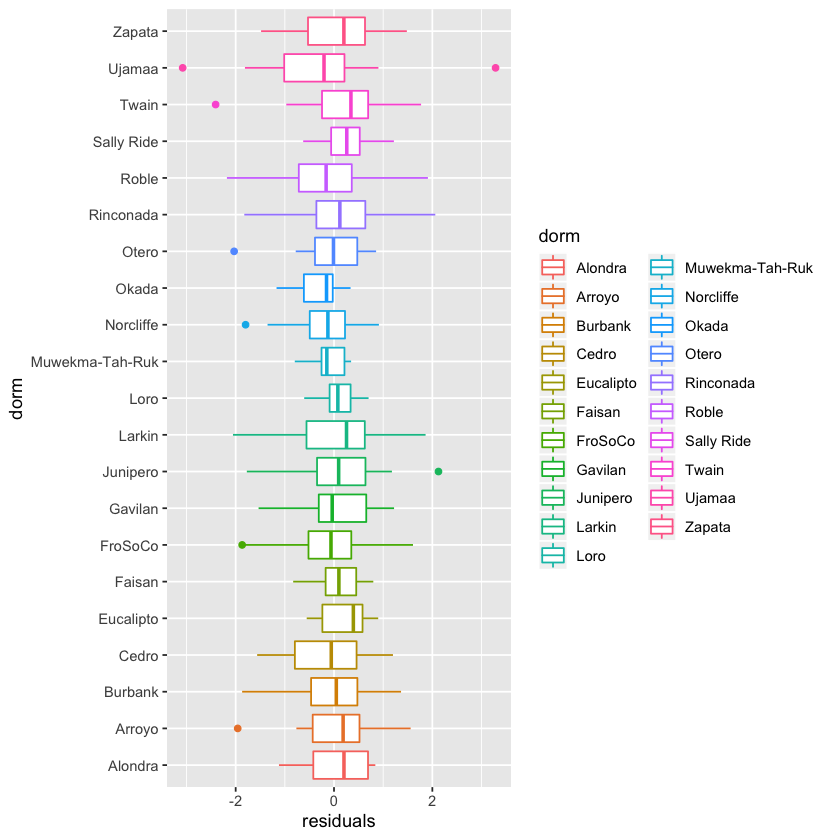

In [25]:
ggplot(data=df, mapping=aes(dorm, residuals)) + 
  geom_boxplot(aes(color=dorm)) + coord_flip()

## Add random effect for dorm, see if significant variance is attributable to dorm membership (Result: no)

In [26]:
mixed_model = lmer(as.formula(paste(fixed_equation, "+ (1|dorm)")), df, REML=TRUE)
summary(mixed_model)

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: as.formula(paste(fixed_equation, "+ (1|dorm)"))
   Data: df

REML criterion at convergence: 1085.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7698 -0.5659  0.0424  0.6366  3.9552 

Random effects:
 Groups   Name        Variance Std.Dev.
 dorm     (Intercept) 0.0000   0.0000  
 Residual             0.6321   0.7951  
Number of obs: 446, groups:  dorm, 21

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            1.734649   0.363061 440.000000   4.778 2.42e-06 ***
life_satisfaction_t1   0.704199   0.039042 440.000000  18.037  < 2e-16 ***
loneliness_t1         -0.144673   0.081879 440.000000  -1.767  0.07794 .  
stress_t1             -0.208110   0.076715 440.000000  -2.713  0.00693 ** 
edges_in               0.028309   0.013799 440.000000   2.052  0.04081 *  
edges_out              0.020117   0.008888 440.000000   2.263  

In [27]:
mixed_model2 = lme(as.formula(fixed_equation), random=~1|dorm, data=df, method = 'ML')
summary(mixed_model2)

Linear mixed-effects model fit by maximum likelihood
 Data: df 
       AIC      BIC    logLik
  1071.087 1103.889 -527.5434

Random effects:
 Formula: ~1 | dorm
         (Intercept) Residual
StdDev: 3.198622e-05 0.789697

Fixed effects: as.formula(fixed_equation) 
                          Value Std.Error  DF   t-value p-value
(Intercept)           1.7346486 0.3630609 420  4.777845  0.0000
life_satisfaction_t1  0.7041989 0.0390423 420 18.036815  0.0000
loneliness_t1        -0.1446733 0.0818794 420 -1.766908  0.0780
stress_t1            -0.2081095 0.0767146 420 -2.712776  0.0069
edges_in              0.0283093 0.0137990 420  2.051542  0.0408
edges_out             0.0201174 0.0088884 420  2.263339  0.0241
 Correlation: 
                     (Intr) lf_s_1 lnln_1 strs_1 edgs_n
life_satisfaction_t1 -0.824                            
loneliness_t1        -0.595  0.412                     
stress_t1            -0.564  0.294 -0.094              
edges_in             -0.155  0.030  0.108 -0.022

In [28]:
anova(mixed_model2, fixed_model_inout)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
mixed_model2,"lme.formula(fixed = as.formula(fixed_equation), data = df, random = ~1 | dorm, method = ""ML"")",1,8,1071.087,1103.889,-527.5434,,NA,NA
fixed_model_inout,"lm(formula = as.formula(fixed_equation), data = df)",2,7,1069.087,1097.789,-527.5434,1 vs 2,2.202521e-07,0.9996255


### Try again, with some dorm-level covariates

In [29]:
fixed_equation

[1] "life_satisfaction_t2 ~ life_satisfaction_t1 + loneliness_t1 + stress_t1  + edges_in + edges_out"

In [30]:
mixed_model_with_l2_covariates = lmer(as.formula(paste(fixed_equation,
    "+ (1 + dorm_life_satisfaction_t1 + dorm_stress_t1 + dorm_loneliness_t1 +",
    "dorm_empathy | dorm)")),
    df)
summary(mixed_model_with_l2_covariates)

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
as.formula(paste(fixed_equation, "+ (1 + dorm_life_satisfaction_t1 + dorm_stress_t1 + dorm_loneliness_t1 +",  
    "dorm_empathy | dorm)"))
   Data: df

REML criterion at convergence: 1085.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7514 -0.5581  0.0365  0.6176  3.9807 

Random effects:
 Groups   Name                      Variance Std.Dev. Corr                   
 dorm     (Intercept)               1.017745 1.00883                         
          dorm_life_satisfaction_t1 0.010624 0.10307  -0.82                  
          dorm_stress_t1            0.050027 0.22367  -0.89  0.94            
          dorm_loneliness_t1        0.157454 0.39680  -0.38 -0.10 -0.05      
          dorm_empathy              0.004344 0.06591   0.26 -0.11 -0.02 -0.76
 Residual                           0.629154 0.79319                         
Number of obs: 446, groups:  dorm, 21

Fixed eff

In [31]:
anova(mixed_model_with_l2_covariates, fixed_model_inout, refit=TRUE)

refitting model(s) with ML (instead of REML)

Warning message in optwrap(optimizer, devfun, x@theta, lower = x@lower, calc.derivs = TRUE, :
“convergence code 1 from bobyqa: bobyqa -- maximum number of function evaluations exceeded”


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fixed_model_inout,7,1069.087,1097.789,-527.5434,1055.087,NA,NA,NA
mixed_model_with_l2_covariates,22,1098.914,1189.121,-527.4572,1054.914,0.1723502,15,1


In [32]:
anova(mixed_model, mixed_model_with_l2_covariates, refit=FALSE)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mixed_model,8,1101.733,1134.535,-542.8663,1085.733,NA,NA,NA
mixed_model_with_l2_covariates,22,1129.617,1219.824,-542.8085,1085.617,0.1156104,14,1


In [33]:
anova(mixed_model, mixed_model_with_l2_covariates, refit=TRUE)

refitting model(s) with ML (instead of REML)

Warning message in optwrap(optimizer, devfun, x@theta, lower = x@lower, calc.derivs = TRUE, :
“convergence code 1 from bobyqa: bobyqa -- maximum number of function evaluations exceeded”


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mixed_model,8,1071.087,1103.889,-527.5434,1055.087,NA,NA,NA
mixed_model_with_l2_covariates,22,1098.914,1189.121,-527.4572,1054.914,0.1723502,14,1
